# Prediction of the Destination Countries of Airbnb Users

## 1. Background
About this Dataset,In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user’s first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: ‘US’, ‘FR’, ‘CA’, ‘GB’, ‘ES’, ‘IT’, ‘PT’, ‘NL’,‘DE’, ‘AU’, ‘NDF’ (no destination found), and ‘other’. Please note that ‘NDF’ is different from ‘other’ because ‘other’ means there was a booking, but is to a country not included in the list, while ‘NDF’ means there wasn’t a booking.

## 2. Data Description
In total, there are 6 csv files in data folder.

1. train_users_2.csv - the training set of users 
2. test_users.csv - the test set of users
- id: user id 
- date_account_created: the date of account creation
- timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
- date_first_booking: date of first booking
- gender
- age
- signup_method
- signup_flow: the page a user came to signup up from
- language: international language preference
- affiliate_channel: what kind of paid marketing
- affiliate_provider: where the marketing is e.g. google, craigslist, other
- first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
- signup_app
- first_device_type
- first_browser
- country_destination: this is the target variable you are to predict

3. sessions.csv - web sessions log for users
- user_id: to be joined with the column ‘id’ in users table
- action
- action_type
- action_detail
- device_type
- secs_elapsed
4. sample_submission.csv - correct format for submitting your predictions


## 3. EDA

### 3.1 Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import datetime
import os
import seaborn as sns#数据可视化
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import pickle #用于存储模型
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('./data/train_users_2.csv')
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
test = pd.read_csv('./data/test_users.csv')
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


### 3.2 Check the name of features

In [4]:
print('the columns name of training dataset:\n',train.columns)
print('the columns name of test dataset:\n',test.columns)

the columns name of training dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
the columns name of test dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


**Analysis**:
1. The train dataset has one more features than test dataset, which is the prediction label(feature)
2. country_destination is the prediction feature


### 3.3 Check the information of the train dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

**Analysis**:
1. There are 213451 entries and 16 features
2. Some features contains many NaN values like data_first_booking. When it comes to feature extraction, it can be removed.

### 3.4 Feature Analysis

#### 3.4.1 date_account_created

In [6]:
# check the the number of registration for each day (groupby day)
print(train.date_account_created.value_counts().head())
print(train.date_account_created.value_counts().tail())

2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
Name: date_account_created, dtype: int64
2010-03-09    1
2010-01-28    1
2010-01-31    1
2010-04-11    1
2010-06-18    1
Name: date_account_created, dtype: int64


In [7]:
# alternative way to give infomration for this feature
train.date_account_created.describe()

count         213451
unique          1634
top       2014-05-13
freq             674
Name: date_account_created, dtype: object

Count is the total number. \
unique is the unique number in the feature.\
top is the date that has the most entries.\
freq is the number of entries for top.

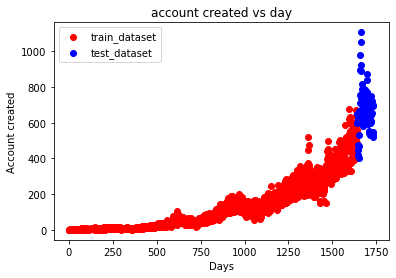

In [8]:
# get the information of user increase
dac_train = train.date_account_created.value_counts()
dac_test = test.date_account_created.value_counts()
# transform to datetime
dac_train_date = pd.to_datetime(dac_train.index)
dac_test_date = pd.to_datetime(dac_test.index)
# calculate the time interval from the beginning date of train dataset
dac_train_day = dac_train_date - dac_train_date.min()
dac_test_day = dac_test_date - dac_train_date.min()
# use scatter plot 
plt.scatter(dac_train_day.days, dac_train.values, color = 'r', label = 'train_dataset')
plt.scatter(dac_test_day.days, dac_test.values, color = 'b', label = 'test_dataset')
plt.title("account created vs day")
plt.xlabel("Days")
plt.ylabel("Account created")
plt.legend(loc = "upper left")

**Analysis**:
1. x axis: the day diff from the registration date
2. y axis: the registration number of that day
3. The number of users increase rapidly.

#### 3.4.2 timestamp_first_active

In [9]:
train.timestamp_first_active.head()

0    20090319043255
1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
Name: timestamp_first_active, dtype: int64

In [10]:
# check the feature if there are any duplicate values
train.timestamp_first_active.value_counts().unique()

array([1], dtype=int64)

1 shows all entries in this feature are unique

In [11]:
tfa_train_dt = train.timestamp_first_active.astype(str) \
            .apply(lambda x:  
                            datetime.datetime(int(x[:4]),
                                              int(x[4:6]), 
                                              int(x[6:8]), 
                                              int(x[8:10]), 
                                              int(x[10:12]),
                                              int(x[12:])))
tfa_train_dt.describe()

count                  213451
unique                 213451
top       2009-03-19 04:32:55
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object

#### 3.4.3 date_first_booking

In [12]:
print(train.date_first_booking.describe())
print(test.date_first_booking.describe())

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: date_first_booking, dtype: float64


**Analysis**:
1. Since the count here do not consider the NaN values, this features has a large propotion of missing values
2. All values in this feature are missing in test dataset
3. Hence, we can delete this feature

#### 3.4.4 date_first_booking

train.age.value_counts().head()

Most users are around 30 years old.

Text(0, 0.5, 'counts')

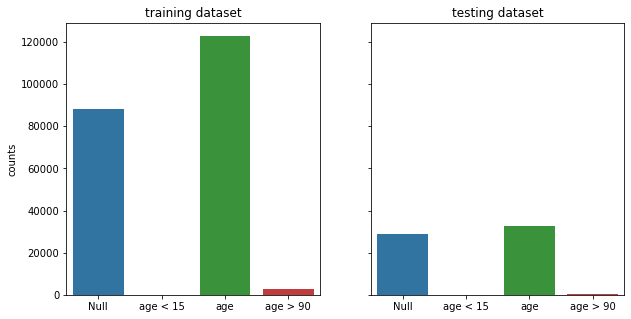

In [13]:
# split all entries into 4 groups: missing values, too small age, reasonable age, too large age
age_train =[train[train.age.isnull()].age.shape[0],
            train.query('age < 15').age.shape[0],
            train.query("age >= 15 & age <= 90").age.shape[0],
            train.query('age > 90').age.shape[0]]

age_test = [test[test.age.isnull()].age.shape[0],
            test.query('age < 15').age.shape[0],
            test.query("age >= 15 & age <= 90").age.shape[0],
            test.query('age > 90').age.shape[0]]

columns = ['Null', 'age < 15', 'age', 'age > 90']

# plot
fig, (ax1,ax2) = plt.subplots(1,2,sharex = True, sharey = True, figsize=(10,5))

sns.barplot(columns, age_train, ax = ax1)
sns.barplot(columns, age_test, ax = ax2)

ax1.set_title('training dataset')
ax2.set_title('testing dataset')
ax1.set_ylabel('counts')

**Analysis**:
1. Most users are in the range of normal ages(15-90). 
2. There are some missing values in this feature

#### 3.4.5 Other features
All these features are categorical abd they are visualised by bar plot

In [14]:
def feature_barplot(feature, df_train = train, df_test = test, figsize=(10,5), rot = 90, saveimg = False): 
    feat_train = df_train[feature].value_counts()
    feat_test = df_test[feature].value_counts()
    fig_feature, (axis1,axis2) = plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)
    sns.barplot(feat_train.index.values, feat_train.values, ax = axis1)
    sns.barplot(feat_test.index.values, feat_test.values, ax = axis2)
    axis1.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis2.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    axis1.set_title(feature + ' of training dataset')
    axis2.set_title(feature + ' of test dataset')
    axis1.set_ylabel('Counts')
    plt.tight_layout()
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)

##### 3.4.5.1 gender

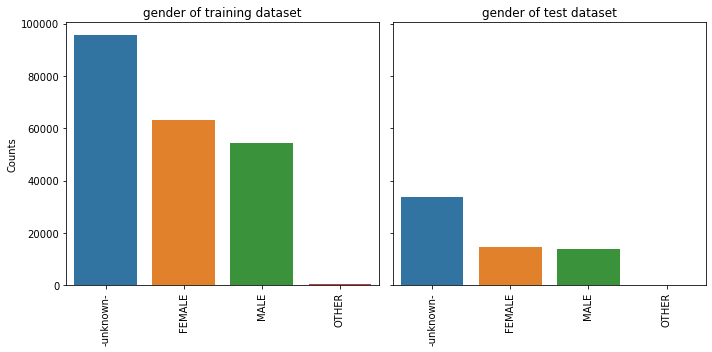

In [15]:
feature_barplot('gender')

##### 3.4.5.2 signup_method

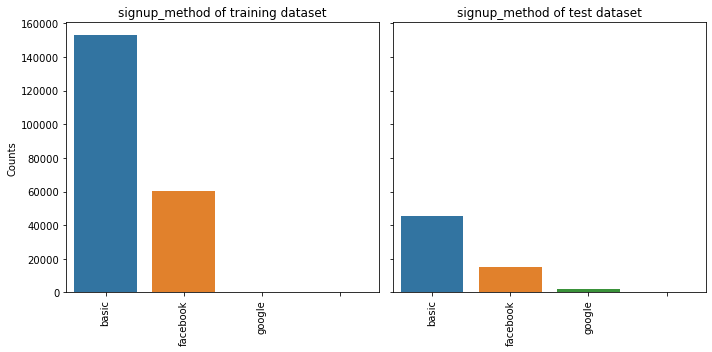

In [16]:
feature_barplot('signup_method')

##### 3.4.5.3 signup_flow

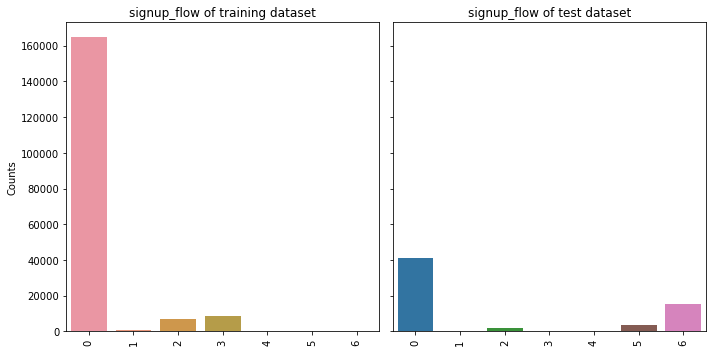

In [17]:
feature_barplot('signup_flow')

##### 3.4.5.4 language

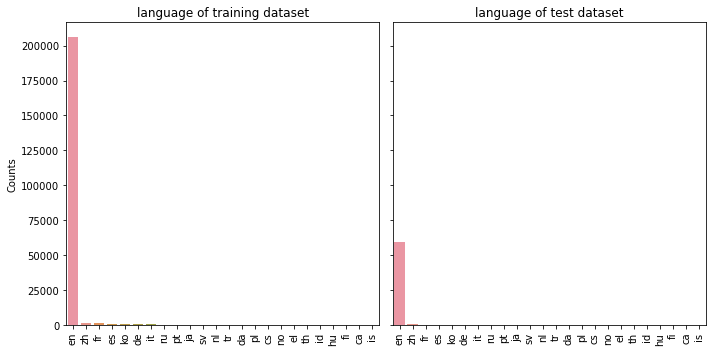

In [18]:
feature_barplot('language')

##### 3.4.5.5 affiliate_channel

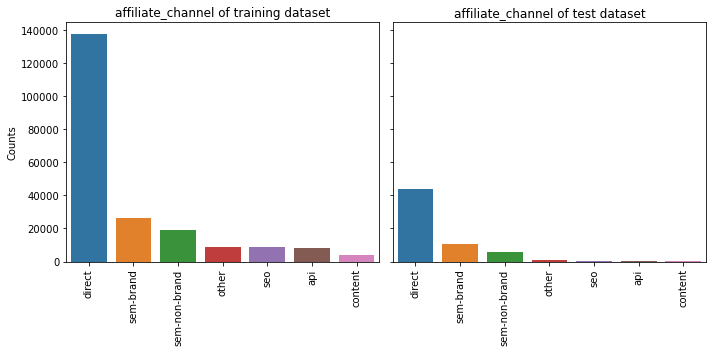

In [19]:
feature_barplot('affiliate_channel')

##### 3.4.5.6 first_affiliate_tracked

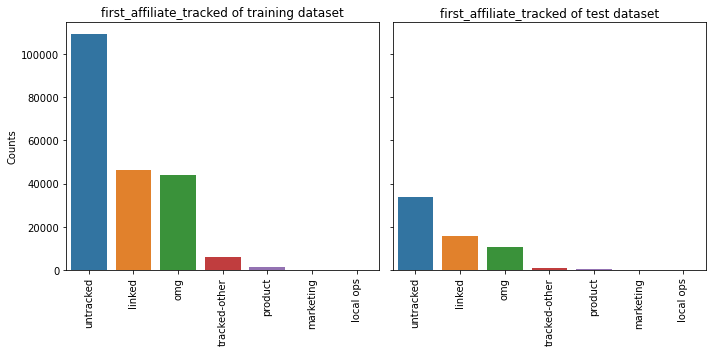

In [20]:
feature_barplot('first_affiliate_tracked')

##### 3.4.5.7 signup_app

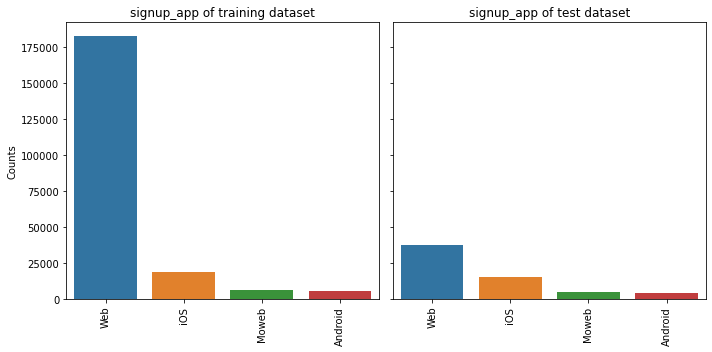

In [21]:
feature_barplot('signup_app')

##### 3.4.5.8 fisrt_device_type

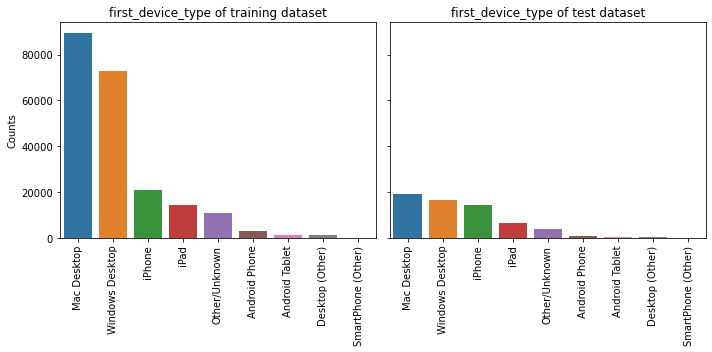

In [22]:
feature_barplot('first_device_type')

##### 3.4.5.9 first_browser

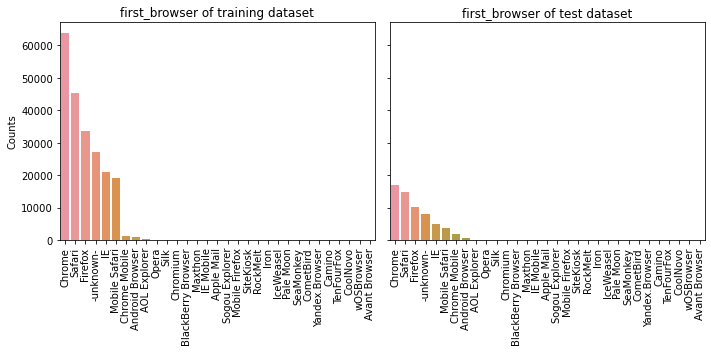

In [23]:
feature_barplot('first_browser')

## 3.5 Session csv

In [24]:
df_sessions = pd.read_csv('./data/sessions.csv')
df_sessions.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [25]:
# change user_id to id in order to join two tables. 
df_sessions.rename(columns = {'user_id':'id'}, inplace = True)

In [26]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [27]:
# check the missing value
df_sessions.isnull().sum()

id                 34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [28]:
# filling the missing values
df_sessions.action = df_sessions.action.fillna('NAN')
df_sessions.action_type = df_sessions.action_type.fillna('NAN')
df_sessions.action_detail = df_sessions.action_detail.fillna('NAN')
df_sessions.isnull().sum()


id                34496
action                0
action_type           0
action_detail         0
device_type           0
secs_elapsed     136031
dtype: int64

### 3.5.1 Feature Extration

In [29]:
# check the number of unique values of action 
df_sessions.action.nunique()

360

In [30]:
df_sessions.action.value_counts().min()

1

The minimum value is 1 and we can group the smaller number to 'other'.\
For each action, if the occurrence is less than 100, it can be grouped into 'other

In [31]:
#Action values with low frequency are changed to 'OTHER'
act_freq = 100  #Threshold of frequency
act = dict(zip(*np.unique(df_sessions.action, return_counts=True)))
df_sessions.action = df_sessions.action.apply(lambda x: 'OTHER' if act[x] < act_freq else x)
#np.unique(df_sessions.action, return_counts=True) 取以数组形式返回非重复的action值和它的数量
#zip（*（a,b））a,b种元素一一对应，返回zip object
